In [94]:
import numpy as np
from skimage.morphology import local_minima
import skimage

import matplotlib.pyplot as plt
import ipympl

%matplotlib widget

In [10]:
def load_data(datafile):
    rows = []
    with open(datafile, 'r') as fp:
        for row in fp.readlines():
            rows.append([int(i) for i in row.strip()])
    return np.array(rows)

In [55]:
testdata = load_data("test.txt")

In [56]:
local_minima(testdata)

array([[False,  True, False, False, False, False, False, False, False,
         True],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False,  True, False, False,
        False]])

In [57]:
mask = local_minima(testdata, connectivity=1, allow_borders=True)

In [41]:
np.sum(testdata[mask] + 1)

548

In [70]:
labels = np.arange(testdata.shape[0] * testdata.shape[1]).reshape(testdata.shape)
masked_labels = np.ma.masked_where(mask == False, labels)
masked_labels

masked_array(
  data=[[--, 1, --, --, --, --, --, --, --, 9],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, 22, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, 46, --, --, --]],
  mask=[[ True, False,  True,  True,  True,  True,  True,  True,  True,
         False],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True, False,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True, False,  True,  True,
          True]],
  fill_value=999999)

In [44]:
testdata

array([[2, 1, 9, 9, 9, 4, 3, 2, 1, 0],
       [3, 9, 8, 7, 8, 9, 4, 9, 2, 1],
       [9, 8, 5, 6, 7, 8, 9, 8, 9, 2],
       [8, 7, 6, 7, 8, 9, 6, 7, 8, 9],
       [9, 8, 9, 9, 9, 6, 5, 6, 7, 8]])

In [45]:
maskdata = np.ma.masked_where(testdata == 9, testdata)
maskdata

masked_array(
  data=[[2, 1, --, --, --, 4, 3, 2, 1, 0],
        [3, --, 8, 7, 8, --, 4, --, 2, 1],
        [--, 8, 5, 6, 7, 8, --, 8, --, 2],
        [8, 7, 6, 7, 8, --, 6, 7, 8, --],
        [--, 8, --, --, --, 6, 5, 6, 7, 8]],
  mask=[[False, False,  True,  True,  True, False, False, False, False,
         False],
        [False,  True, False, False, False,  True, False,  True, False,
         False],
        [ True, False, False, False, False, False,  True, False,  True,
         False],
        [False, False, False, False, False,  True, False, False, False,
          True],
        [ True, False,  True,  True,  True, False, False, False, False,
         False]],
  fill_value=999999)

In [74]:
segim = skimage.segmentation.watershed(testdata)
masked_seg = np.ma.masked_where(testdata == 9, segim)
masked_seg

masked_array(
  data=[[1, 1, --, --, --, 2, 2, 2, 2, 2],
        [1, --, 3, 3, 3, --, 2, --, 2, 2],
        [--, 3, 3, 3, 3, 3, --, 4, --, 2],
        [3, 3, 3, 3, 3, --, 4, 4, 4, --],
        [--, 3, --, --, --, 4, 4, 4, 4, 4]],
  mask=[[False, False,  True,  True,  True, False, False, False, False,
         False],
        [False,  True, False, False, False,  True, False,  True, False,
         False],
        [ True, False, False, False, False, False,  True, False,  True,
         False],
        [False, False, False, False, False,  True, False, False, False,
          True],
        [ True, False,  True,  True,  True, False, False, False, False,
         False]],
  fill_value=999999,
  dtype=int32)

In [157]:
def segment(datafile):
    data = load_data(datafile)
    # use watershed segmentaition to fill in basins around local minima
    segim = skimage.segmentation.watershed(data)
    # mask where data == 9
    masked = np.ma.masked_where(data == 9, segim)
    nseg = np.nanmax(masked)
    sizes = []
    # find and sort sizes of segmented regions
    for i in range(1, nseg+1):
        regsize = np.nansum(np.ma.masked_where(masked != i, masked))/i
        sizes.append(regsize)
    sizes = sorted(sizes)
    #return sizes
    return np.prod([sizes[-1], sizes[-2], sizes[-3]])

In [160]:
segment("input.txt")

786048.0

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
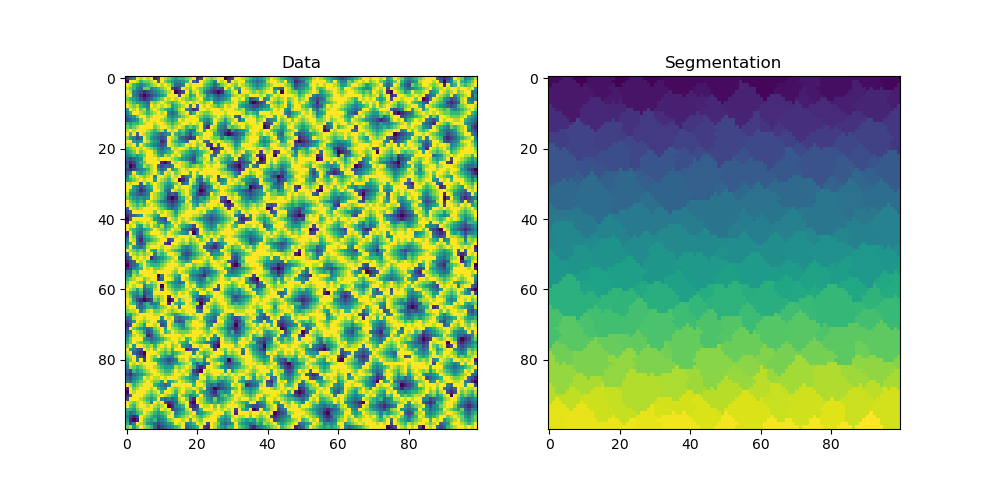

In [111]:
full_data = load_data("input.txt")
segim = skimage.segmentation.watershed(full_data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(full_data)
ax1.set_title("Data")
ax2.imshow(segim)
ax2.set_title("Segmentation")
plt.show()

In [112]:
segim.max()

235